In [500]:
#importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [501]:
main_loan = pd.read_csv(r"E:/main_loan_base.csv")
monthly_balance = pd.read_csv(r"E:/monthly_balance_base.csv")
repayment = pd.read_csv(r"E:/repayment_base.csv")

In [502]:
main_loan.head(5)

loan_acc_num  customer_name                         customer_address  \
0   LN79307711     Aarna Sura        09/506, Anand Path, Ongole 646592   
1   LN88987787    Amira Konda      11, Dhaliwal Circle\nRaichur 659460   
2   LN78096023  Eshani Khosla   H.No. 31\nAtwal Street\nKatihar-037896   
3   LN56862431     Divij Kala     766, Gulati Marg\nPudukkottai-051396   
4   LN77262680    Vaibhav Bir  55/73, Sachdev Marg\nDharmavaram-332966   

          loan_type  loan_amount  collateral_value  cheque_bounces  \
0  Consumer-Durable        21916           4929.47               3   
1       Two-Wheeler       121184          10254.50               1   
2               Car       487036         116183.86               0   
3       Two-Wheeler        52125          10310.05               5   
4  Consumer-Durable         8635           1051.25               0   

   number_of_loans  missed_repayments  vintage_in_months  tenure_years  \
0                0                  3                127             2   
1                0                  0                156             2   
2                1                 10                 22             3   
3                2                  9                 30             2   
4                1                  3                 62             2   

   interest  monthly_emi disbursal_date default_date  
0      10.1      1012.32     2019-04-14   2020-07-31  
1      11.8      5693.24     2015-04-14   2016-07-30  
2      14.6     16788.02     2015-01-10   2015-04-18  
3       9.6      2395.69     2018-02-07   2018-09-13  
4       9.6       396.87     2014-12-25   2016-02-20

In [503]:
main_loan.shape

(50000, 15)

In [504]:
main_loan.isna().sum()

loan_acc_num         0
customer_name        0
customer_address     0
loan_type            0
loan_amount          0
collateral_value     0
cheque_bounces       0
number_of_loans      0
missed_repayments    0
vintage_in_months    0
tenure_years         0
interest             0
monthly_emi          0
disbursal_date       0
default_date         0
dtype: int64

In [505]:
#creating new data with no duplicates
main_loan= main_loan[~main_loan['loan_acc_num'].duplicated()]

In [506]:
main_loan.shape

(49985, 15)

In [507]:
monthly_balance.head(5)

loan_acc_num        date  balance_amount
0   LN79307711  2010-03-26      407.343213
1   LN79307711  2010-04-25      545.431227
2   LN79307711  2010-05-25      861.932145
3   LN79307711  2010-06-24      562.082133
4   LN79307711  2010-07-24       37.768861

In [508]:
monthly_balance.shape

(4002490, 3)

In [509]:
repayment.head(5)

loan_acc_num  repayment_amount repayment_date
0   LN79307711       1012.320000     2019-05-18
1   LN79307711        667.987539     2019-06-20
2   LN79307711       1012.320000     2019-07-16
3   LN79307711       1012.320000     2019-08-16
4   LN79307711       1012.320000     2019-09-22

In [510]:
repayment.shape

(626601, 3)

In [511]:
#importing Test datasets
test_main_loan = pd.read_csv (r"E:/test_main_loan_base.csv")
test_monthly_balance = pd.read_csv (r"E:/test_monthly_balance_base.csv")
test_repayment = pd.read_csv (r"E:/test_repayment_base.csv")

In [512]:
test_main_loan.shape

(10000, 15)

In [513]:
test_monthly_balance.shape

(801407, 3)

In [514]:
test_repayment.shape

(125860, 3)

In [515]:
main_loan['disbursal_date'].value_counts()

2013-03-16    27
2017-11-18    27
2012-10-07    26
2016-11-04    26
2021-02-22    26
              ..
2017-08-18     4
2014-06-03     3
2015-03-28     3
2017-04-09     3
2015-10-22     3
Name: disbursal_date, Length: 3653, dtype: int64

In [516]:
main_loan['disbursal_date'] = pd.to_datetime(main_loan['disbursal_date'], infer_datetime_format=True)
main_loan['default_date'] = pd.to_datetime(main_loan['default_date'], infer_datetime_format=True)

In [517]:
main_loan['disbursal_date'].value_counts()

2013-03-16    27
2017-11-18    27
2012-10-07    26
2016-11-04    26
2021-02-22    26
              ..
2017-08-18     4
2014-06-03     3
2015-03-28     3
2017-04-09     3
2015-10-22     3
Name: disbursal_date, Length: 3653, dtype: int64

In [518]:
test_main_loan['disbursal_date'].value_counts()

2019-06-08    9
2016-03-07    9
2020-06-26    8
2021-01-29    8
2016-06-06    8
             ..
2012-07-02    1
2014-03-31    1
2017-09-13    1
2013-05-14    1
2015-04-01    1
Name: disbursal_date, Length: 3423, dtype: int64

In [519]:
#creating new data with no duplicates
test_main_loan = test_main_loan[~test_main_loan['loan_acc_num'].duplicated()]

In [520]:
test_main_loan.shape

(9997, 15)

In [521]:
repayment.isna().sum()

loan_acc_num        0
repayment_amount    0
repayment_date      0
dtype: int64

In [522]:
repayment = round(repayment.groupby('loan_acc_num')['repayment_amount'].sum(),2)
repayment = pd.DataFrame({"loan_acc_num":repayment.index, "repayment_amount":repayment.values})
repayment.head()

loan_acc_num  repayment_amount
0   LN10000701          40020.99
1   LN10001077         112218.47
2   LN10004116         290634.94
3   LN10007976         337321.72
4   LN10010204          61290.49

In [523]:
test_repayment = round(test_repayment.groupby('loan_acc_num')['repayment_amount'].sum(),2)
test_repayment = pd.DataFrame({"loan_acc_num":test_repayment.index, "repayment_amount":test_repayment.values})
test_repayment.head()

loan_acc_num  repayment_amount
0   LN10011015           1725.31
1   LN10028091           3560.31
2   LN10033713          11582.17
3   LN10045654          66181.74
4   LN10051605          87664.41

In [524]:
repayment.shape

(46008, 2)

In [525]:
new = pd.merge(
    left=main_loan,
    right=repayment,
    left_on='loan_acc_num',
    right_on='loan_acc_num',
    how='left'
)

In [526]:
test_new = pd.merge(
    left=test_main_loan,
    right=test_repayment,
    left_on='loan_acc_num',
    right_on='loan_acc_num',
    how='left'
)

In [527]:
new.shape

(49985, 16)

In [528]:
#deriving the LGD target value
new['target'] = (new['loan_amount']-(new['collateral_value']+new['repayment_amount']))/new['loan_amount']
test_new['target'] = (test_new['loan_amount']-(test_new['collateral_value']+test_new['repayment_amount']))/test_new['loan_amount']

In [529]:
new.head(5)

loan_acc_num  customer_name                         customer_address  \
0   LN79307711     Aarna Sura        09/506, Anand Path, Ongole 646592   
1   LN88987787    Amira Konda      11, Dhaliwal Circle\nRaichur 659460   
2   LN78096023  Eshani Khosla   H.No. 31\nAtwal Street\nKatihar-037896   
3   LN56862431     Divij Kala     766, Gulati Marg\nPudukkottai-051396   
4   LN77262680    Vaibhav Bir  55/73, Sachdev Marg\nDharmavaram-332966   

          loan_type  loan_amount  collateral_value  cheque_bounces  \
0  Consumer-Durable        21916           4929.47               3   
1       Two-Wheeler       121184          10254.50               1   
2               Car       487036         116183.86               0   
3       Two-Wheeler        52125          10310.05               5   
4  Consumer-Durable         8635           1051.25               0   

   number_of_loans  missed_repayments  vintage_in_months  tenure_years  \
0                0                  3                127             2   
1                0                  0                156             2   
2                1                 10                 22             3   
3                2                  9                 30             2   
4                1                  3                 62             2   

   interest  monthly_emi disbursal_date default_date  repayment_amount  \
0      10.1      1012.32     2019-04-14   2020-07-31          13572.58   
1      11.8      5693.24     2015-04-14   2016-07-30          96243.61   
2      14.6     16788.02     2015-01-10   2015-04-18          74083.73   
3       9.6      2395.69     2018-02-07   2018-09-13               NaN   
4       9.6       396.87     2014-12-25   2016-02-20           4462.51   

     target  
0  0.155774  
1  0.121187  
2  0.609336  
3       NaN  
4  0.361464

In [530]:
test_new.head(5)

loan_acc_num     customer_name                       customer_address  \
0   LN14086568        Jayesh Kar    83/65, Deo Circle\nBhagalpur-852841   
1   LN37082418     Kaira Chhabra           17\nSule Ganj\nAizawl 491897   
2   LN42963368  Anahita Bhargava  51/421\nKannan Chowk\nVaranasi-209999   
3   LN54572294        Myra Samra    22\nSubramanian Marg, Bhilai 850327   
4   LN65792799       Arhaan Rana      22, Kapoor Road\nJalandhar 667155   

          loan_type  loan_amount  collateral_value  cheque_bounces  \
0               Car      1259062          10184.09               3   
1  Consumer-Durable        21731           2313.21               0   
2               Car       207660           8308.71               1   
3       Two-Wheeler       193528          26432.24               4   
4  Consumer-Durable         5980           1641.66               1   

   number_of_loans  missed_repayments  vintage_in_months  tenure_years  \
0                1                  5                103             1   
1                3                 26                 39             5   
2                2                  0                 63             1   
3                3                 12                 15             2   
4                1                  0                152             1   

   interest  monthly_emi disbursal_date default_date  repayment_amount  \
0      12.1    111925.04     2014-11-23   2015-04-30         675861.05   
1      12.2       485.59     2014-01-11   2017-03-11           2208.65   
2      13.9     18635.42     2012-10-26   2013-06-23         111812.52   
3      12.5      9155.29     2021-10-07   2023-01-19          18310.58   
4      14.6       538.62     2020-03-04   2020-10-08           3428.64   

     target  
0  0.455114  
1  0.791917  
2  0.421549  
3  0.768804  
4  0.152124

In [531]:
new.isnull().sum()

loan_acc_num            0
customer_name           0
customer_address        0
loan_type               0
loan_amount             0
collateral_value        0
cheque_bounces          0
number_of_loans         0
missed_repayments       0
vintage_in_months       0
tenure_years            0
interest                0
monthly_emi             0
disbursal_date          0
default_date            0
repayment_amount     3977
target               3977
dtype: int64

In [532]:
#null value imputation
new['repayment_amount'] = new['repayment_amount'].fillna(0)

In [533]:
#null value imputation
new['target'] = new['target'].fillna(new['target'].mean())

In [534]:
new.isnull().sum()

loan_acc_num         0
customer_name        0
customer_address     0
loan_type            0
loan_amount          0
collateral_value     0
cheque_bounces       0
number_of_loans      0
missed_repayments    0
vintage_in_months    0
tenure_years         0
interest             0
monthly_emi          0
disbursal_date       0
default_date         0
repayment_amount     0
target               0
dtype: int64

In [535]:
test_new.isnull().sum()

loan_acc_num           0
customer_name          0
customer_address       0
loan_type              0
loan_amount            0
collateral_value       0
cheque_bounces         0
number_of_loans        0
missed_repayments      0
vintage_in_months      0
tenure_years           0
interest               0
monthly_emi            0
disbursal_date         0
default_date           0
repayment_amount     768
target               768
dtype: int64

In [536]:
#null value imputation
test_new['repayment_amount'] = test_new['repayment_amount'].fillna(0)

In [537]:
#null value imputation
test_new['target'] = test_new['target'].fillna(test_new['target'].mean())

In [538]:
test_new.isnull().sum()

loan_acc_num         0
customer_name        0
customer_address     0
loan_type            0
loan_amount          0
collateral_value     0
cheque_bounces       0
number_of_loans      0
missed_repayments    0
vintage_in_months    0
tenure_years         0
interest             0
monthly_emi          0
disbursal_date       0
default_date         0
repayment_amount     0
target               0
dtype: int64

In [539]:
#creating new variable: feature engineering
new['due'] = new['loan_amount'] - new['repayment_amount']

In [540]:
#creating new variable: feature engineering
test_new['due'] = test_new['loan_amount'] - test_new['repayment_amount']

In [541]:
monthly_balance['loan_acc_num'].nunique()

49671

In [542]:
monthly_balance.head(5)

loan_acc_num        date  balance_amount
0   LN79307711  2010-03-26      407.343213
1   LN79307711  2010-04-25      545.431227
2   LN79307711  2010-05-25      861.932145
3   LN79307711  2010-06-24      562.082133
4   LN79307711  2010-07-24       37.768861

In [543]:
monthly_balance =round(monthly_balance.groupby('loan_acc_num')['balance_amount'].mean(),2)
monthly_balance = pd.DataFrame({"loan_acc_num":monthly_balance.index, "average_monthly_balance":monthly_balance.values})
monthly_balance.head()

loan_acc_num  average_monthly_balance
0   LN10000701                  2301.88
1   LN10001077                  2296.28
2   LN10004116                  8887.38
3   LN10007976                  9420.56
4   LN10010204                  6446.21

In [544]:
test_monthly_balance = round(test_monthly_balance.groupby('loan_acc_num')['balance_amount'].mean(),2)
test_monthly_balance= pd.DataFrame({"loan_acc_num":test_monthly_balance.index, "average_monthly_balance":test_monthly_balance.values})
test_monthly_balance.head()

loan_acc_num  average_monthly_balance
0   LN10011015                    25.09
1   LN10028091                    62.53
2   LN10033713                   182.41
3   LN10045654                  1838.35
4   LN10051605                  3374.17

In [545]:
#Merge the datasets
new_data = pd.merge(
    left=new,
    right=monthly_balance,
    left_on='loan_acc_num',
    right_on='loan_acc_num',
    how='left'
)
new_data.shape

(49985, 19)

In [546]:
#Merge the datasets
test_new_data= pd.merge(
    left=test_new,
    right=test_monthly_balance,
    left_on='loan_acc_num',
    right_on='loan_acc_num',
    how='left'
)
test_new_data.shape

(9997, 19)

In [547]:
new_data.isnull().sum()

loan_acc_num                 0
customer_name                0
customer_address             0
loan_type                    0
loan_amount                  0
collateral_value             0
cheque_bounces               0
number_of_loans              0
missed_repayments            0
vintage_in_months            0
tenure_years                 0
interest                     0
monthly_emi                  0
disbursal_date               0
default_date                 0
repayment_amount             0
target                       0
due                          0
average_monthly_balance    314
dtype: int64

In [548]:
new_data['average_monthly_balance'] = new_data['average_monthly_balance'] = new_data['average_monthly_balance'].fillna(new_data['average_monthly_balance'].mean())

In [549]:
test_new_data.isnull().sum()

loan_acc_num                0
customer_name               0
customer_address            0
loan_type                   0
loan_amount                 0
collateral_value            0
cheque_bounces              0
number_of_loans             0
missed_repayments           0
vintage_in_months           0
tenure_years                0
interest                    0
monthly_emi                 0
disbursal_date              0
default_date                0
repayment_amount            0
target                      0
due                         0
average_monthly_balance    57
dtype: int64

In [550]:
test_new_data['average_monthly_balance'] = test_new_data['average_monthly_balance'] = test_new_data['average_monthly_balance'].fillna(test_new_data['average_monthly_balance'].mean())

In [551]:
new_data.isnull().sum()

loan_acc_num               0
customer_name              0
customer_address           0
loan_type                  0
loan_amount                0
collateral_value           0
cheque_bounces             0
number_of_loans            0
missed_repayments          0
vintage_in_months          0
tenure_years               0
interest                   0
monthly_emi                0
disbursal_date             0
default_date               0
repayment_amount           0
target                     0
due                        0
average_monthly_balance    0
dtype: int64

In [552]:
test_new_data.isnull().sum()

loan_acc_num               0
customer_name              0
customer_address           0
loan_type                  0
loan_amount                0
collateral_value           0
cheque_bounces             0
number_of_loans            0
missed_repayments          0
vintage_in_months          0
tenure_years               0
interest                   0
monthly_emi                0
disbursal_date             0
default_date               0
repayment_amount           0
target                     0
due                        0
average_monthly_balance    0
dtype: int64

In [553]:
new_data.describe()

loan_amount  collateral_value  cheque_bounces  number_of_loans  \
count  4.998500e+04      49985.000000    49985.000000     49985.000000   
mean   3.817142e+05      57195.113444        1.764769         1.509573   
std    5.037769e+05      93412.679667        1.760305         1.259326   
min    2.000000e+03          0.070000        0.000000         0.000000   
25%    2.393400e+04       3329.430000        0.000000         0.000000   
50%    1.926920e+05      19866.280000        1.000000         1.000000   
75%    4.334780e+05      62323.370000        3.000000         2.000000   
max    1.999992e+06     592545.710000       11.000000         6.000000   

       missed_repayments  vintage_in_months  tenure_years      interest  \
count       49985.000000       49985.000000  49985.000000  49985.000000   
mean            9.807482          80.016705      2.994578     11.484611   
std             7.787036          44.141987      1.415455      2.019790   
min             0.000000          15.000000      1.000000      8.000000   
25%             4.000000          44.000000      2.000000      9.700000   
50%             8.000000          78.000000      3.000000     11.500000   
75%            15.000000         113.000000      4.000000     13.200000   
max            38.000000         258.000000      5.000000     15.000000   

         monthly_emi  repayment_amount        target           due  \
count   49985.000000      4.998500e+04  49985.000000  4.998500e+04   
mean    16593.115676      1.514337e+05      0.423265  2.302806e+05   
std     26696.292090      2.554824e+05      0.225701  3.437854e+05   
min        42.520000      0.000000e+00     -5.708000 -8.573322e+04   
25%      1158.280000      6.761950e+03      0.242430  1.580488e+04   
50%      6541.020000      4.849626e+04      0.423265  9.599627e+04   
75%     19438.430000      1.668996e+05      0.600358  2.602902e+05   
max    179521.680000      1.852111e+06      0.898372  1.997948e+06   

       average_monthly_balance  
count             49985.000000  
mean               7679.277191  
std               16071.151167  
min                   0.100000  
25%                 417.980000  
50%                2186.470000  
75%                7557.930000  
max              261799.900000

In [554]:
#dropping the records with negative LGD
new_data = new_data.drop(new_data[new_data['target']<0].index)

In [555]:
test=test_new_data.copy()

## EDA

In [556]:
#separating numeric and categorical features
numeric_data = new_data.select_dtypes(include=[np.number])
categorical_data = new_data.select_dtypes(exclude=[np.number])

In [557]:
numeric_data.shape

(49889, 13)

In [558]:
categorical_data.shape

(49889, 6)

In [559]:
#top 10 correlated features
def get_redundant_pairs(new):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = new.columns
    for i in range(0, new.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(new, n=10):
    au_corr = new.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(new)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top 10 Absolute Correlations")
print(get_top_abs_correlations(numeric_data, 10))

Top 10 Absolute Correlations
loan_amount        due                        0.886538
                   monthly_emi                0.819133
                   collateral_value           0.809763
collateral_value   due                        0.803826
monthly_emi        average_monthly_balance    0.798077
loan_amount        repayment_amount           0.780483
monthly_emi        due                        0.718615
repayment_amount   average_monthly_balance    0.714145
vintage_in_months  target                     0.705141
collateral_value   monthly_emi                0.668101
dtype: float64


In [560]:
from statistics import mean
print("Average Monthly EMI: ",round(mean(new_data['monthly_emi']),2))
print("Average Repayment Amount: ",round(mean(new_data['repayment_amount']),2))
print("Average Loan Amount: ",round(mean(new_data['loan_amount']),2))

Average Monthly EMI:  16553.64
Average Repayment Amount:  150993.26
Average Loan Amount:  381630.43


In [561]:
#univaraiate analysis

Text(0.5, 1.0, 'Type of loan')

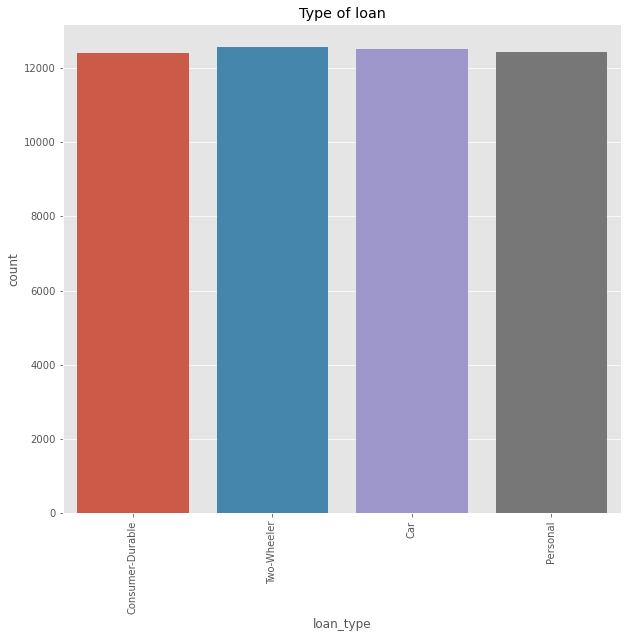

In [562]:
plt.figure(figsize = (10,9))
sns.countplot(new_data['loan_type']).tick_params(axis='x', rotation = 90)
plt.title('Type of loan')

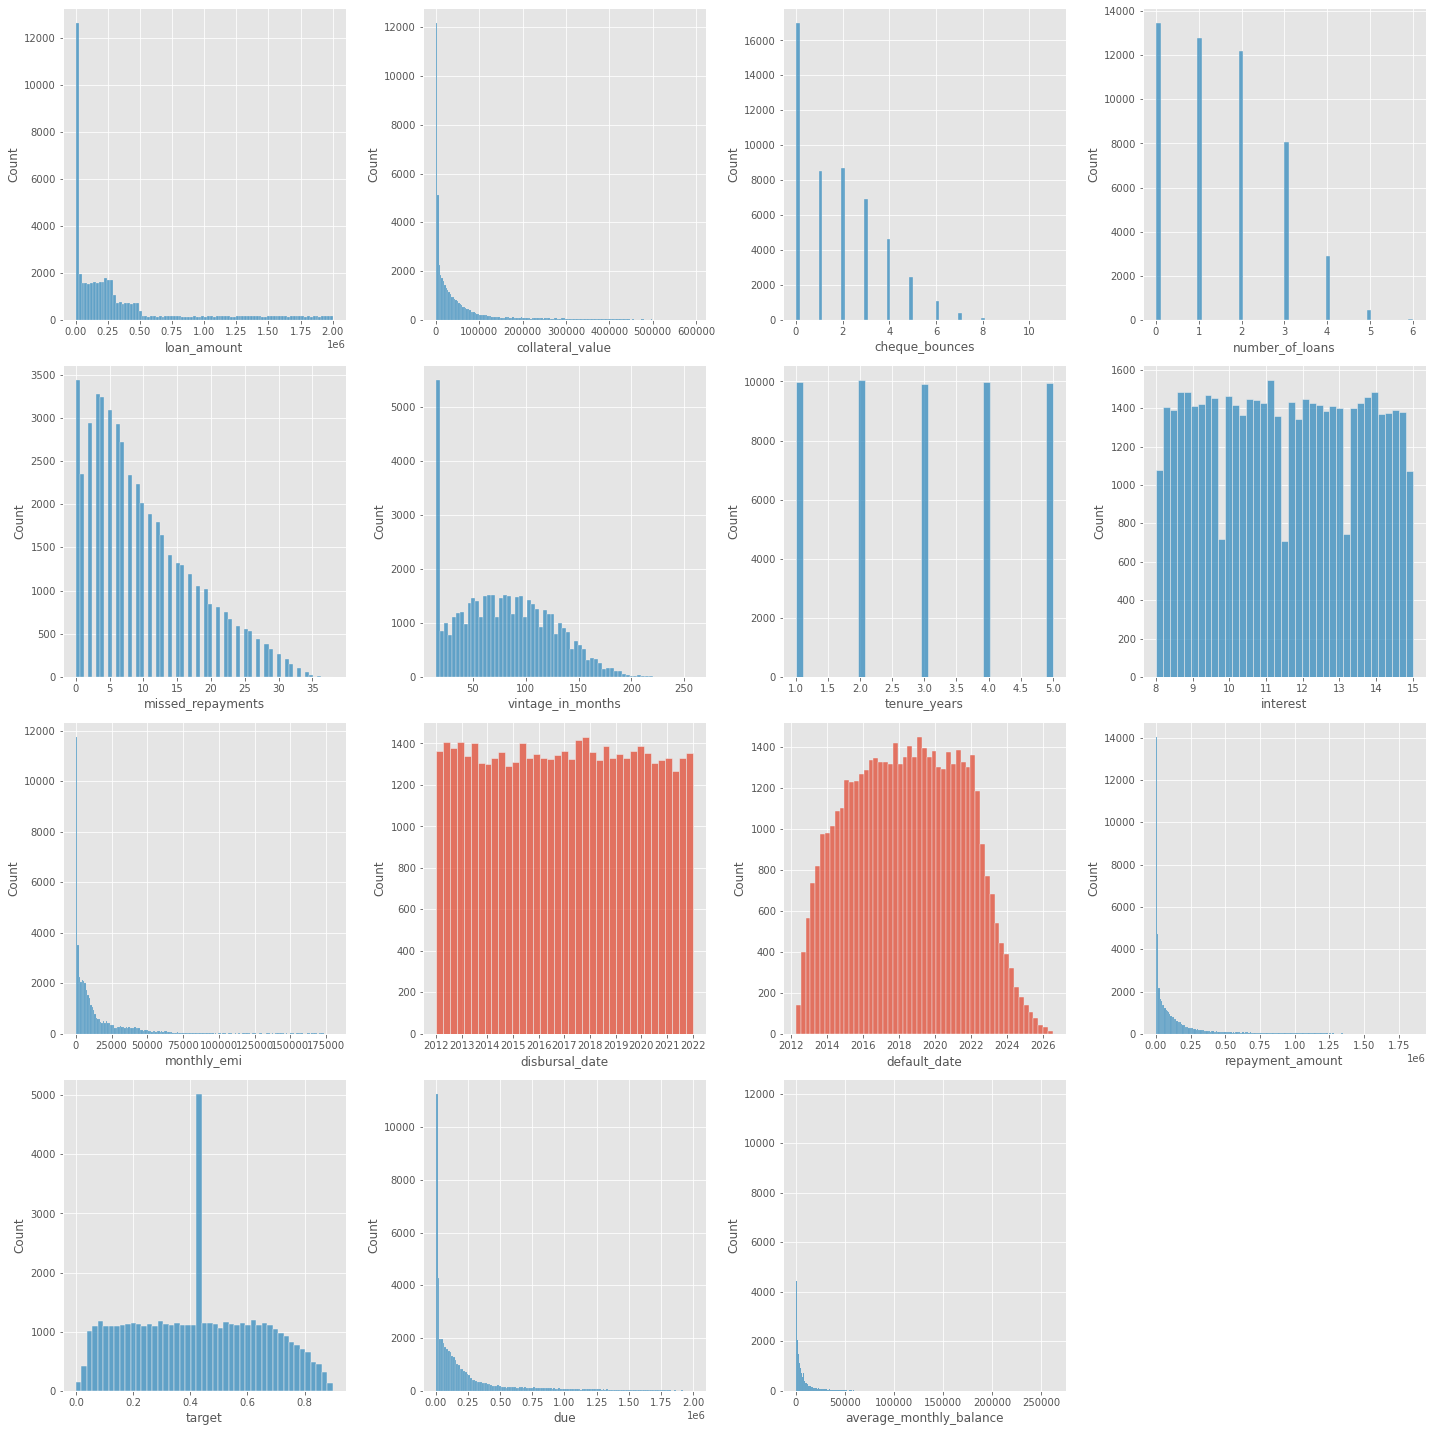

In [563]:
cols = 4
rows = 4
num_cols = new_data.select_dtypes(exclude='object').columns
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(rows,cols,i+1)
    
    sns.histplot(x = new_data[col], ax = ax)
    
fig.tight_layout()  
plt.show()

<AxesSubplot:xlabel='loan_amount', ylabel='repayment_amount'>

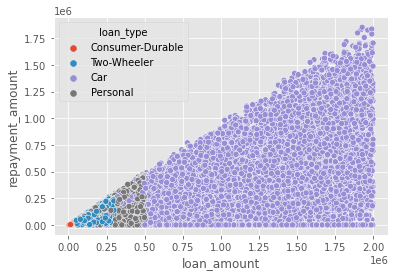

In [564]:
# Box plotting for Credit amount
sns.scatterplot(x=new_data.loan_amount, 
                y = new_data.repayment_amount, 
                data=new_data,hue = 'loan_type')

<Figure size 720x648 with 0 Axes>

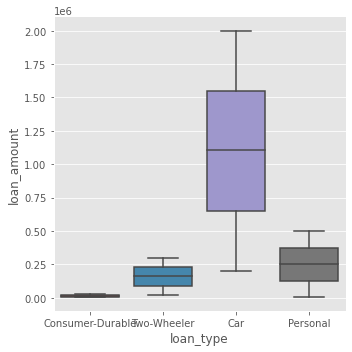

In [565]:
plt.figure(figsize=(10,9))
sns.catplot(data=new_data, x="loan_type", y="loan_amount", kind="box")

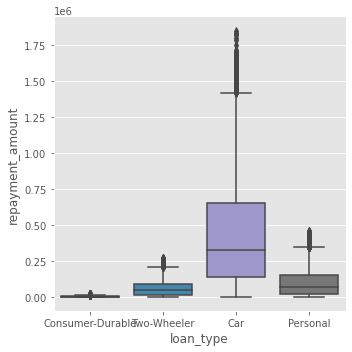

In [566]:
sns.catplot(data=new_data, x="loan_type", y="repayment_amount", kind="box")

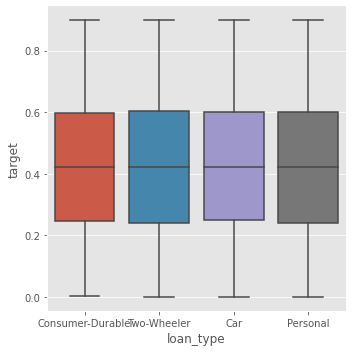

In [567]:
sns.catplot(data=new_data, x="loan_type", y="target", kind="box")

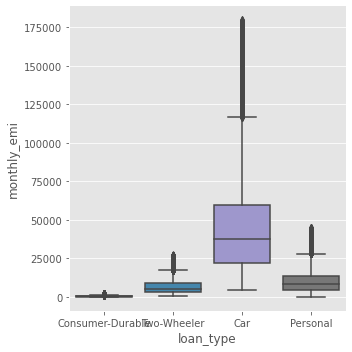

In [568]:
sns.catplot(data=new_data, x="loan_type", y="monthly_emi", kind="box")

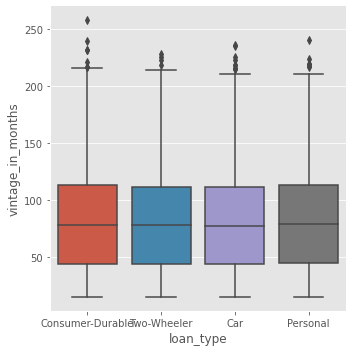

In [569]:
sns.catplot(data=new_data, x="loan_type", y="vintage_in_months", kind="box")

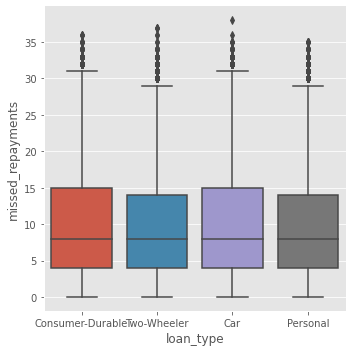

In [570]:
sns.catplot(data=new_data, x="loan_type", y="missed_repayments", kind="box")

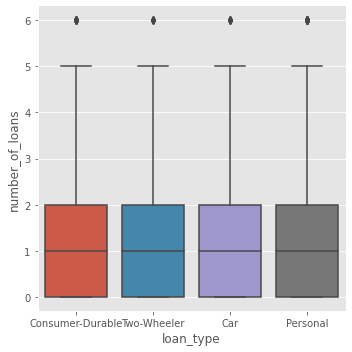

In [571]:
sns.catplot(data=new_data, x="loan_type", y="number_of_loans", kind="box")

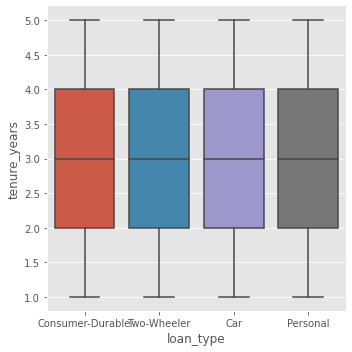

In [572]:
sns.catplot(data=new_data, x="loan_type", y="tenure_years", kind="box")

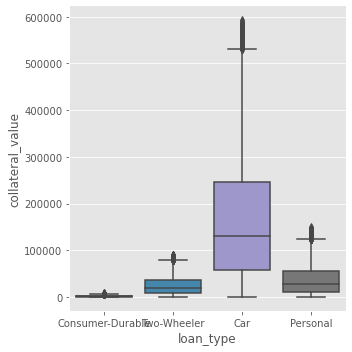

In [573]:
sns.catplot(data=new_data, x="loan_type", y="collateral_value", kind="box")

<AxesSubplot:>

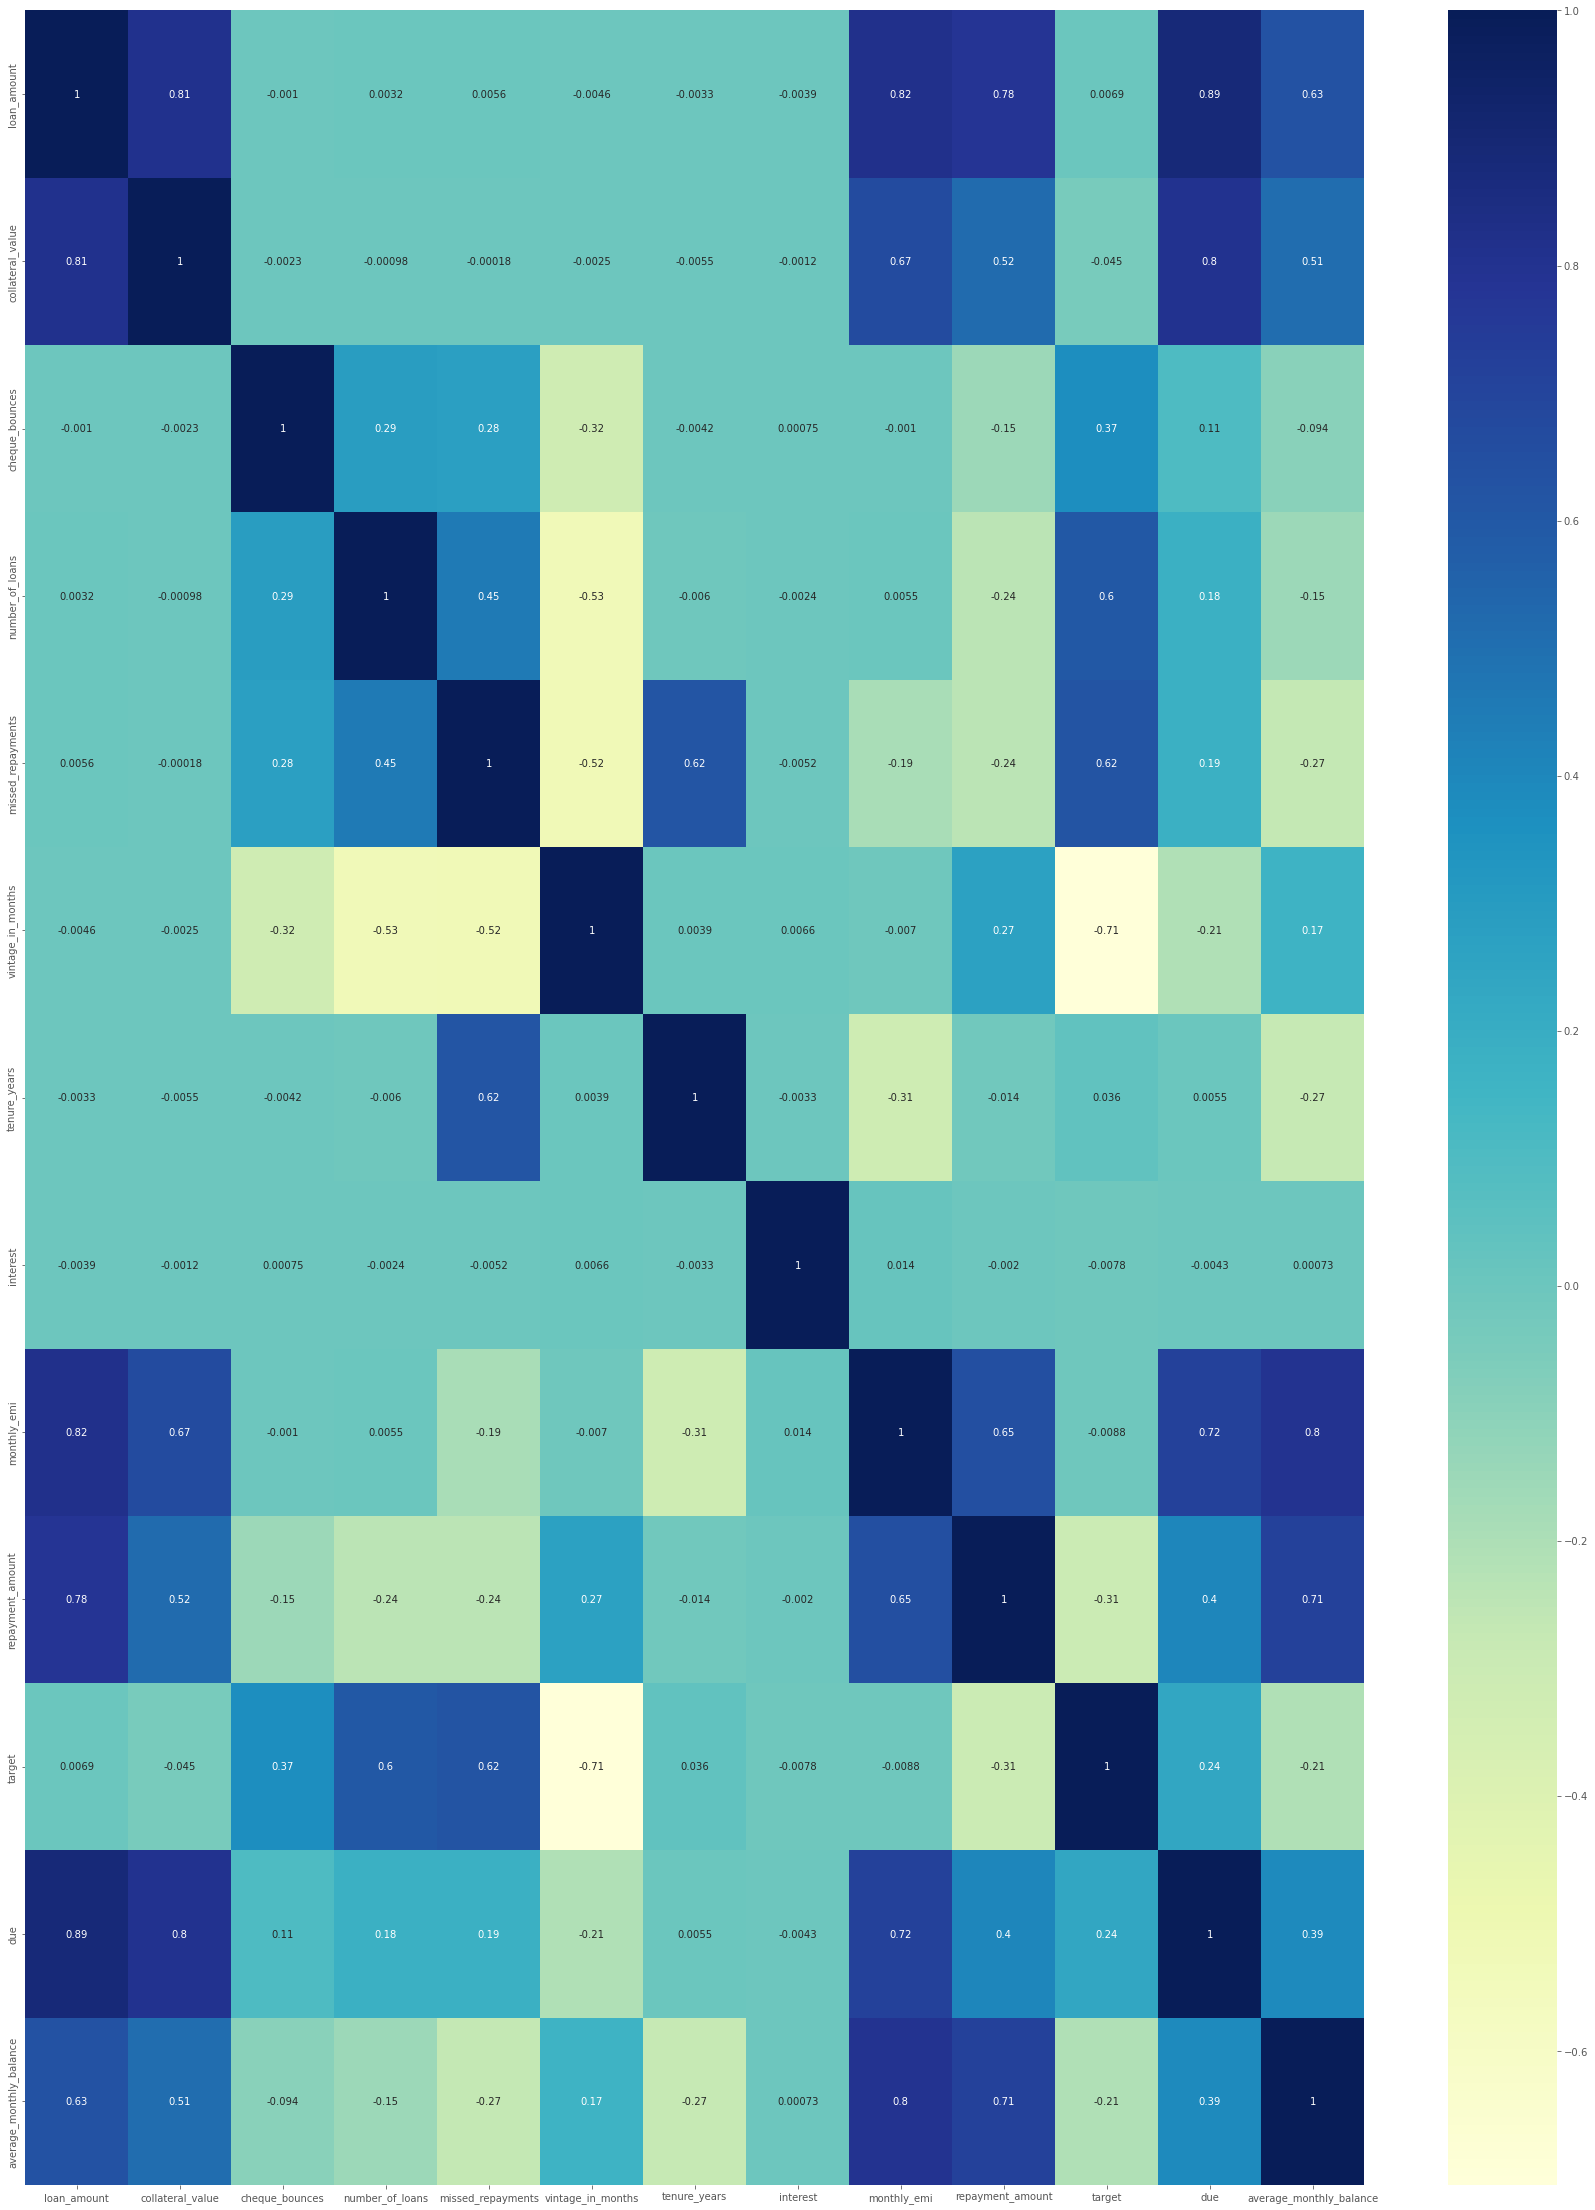

In [574]:
#Correlation Plot: Heatmap
plt.figure(figsize = (30,40))

corr = new_data.corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True)

## Observation: Repayment Amount or EMI amount of Car loan are way higher than other loan types

In [575]:
## variable transformation,feature engenerring

In [576]:
numeric_data.head(5)

loan_amount  collateral_value  cheque_bounces  number_of_loans  \
0        21916           4929.47               3                0   
1       121184          10254.50               1                0   
2       487036         116183.86               0                1   
3        52125          10310.05               5                2   
4         8635           1051.25               0                1   

   missed_repayments  vintage_in_months  tenure_years  interest  monthly_emi  \
0                  3                127             2      10.1      1012.32   
1                  0                156             2      11.8      5693.24   
2                 10                 22             3      14.6     16788.02   
3                  9                 30             2       9.6      2395.69   
4                  3                 62             2       9.6       396.87   

   repayment_amount    target        due  average_monthly_balance  
0          13572.58  0.155774    8343.42                   585.51  
1          96243.61  0.121187   24940.39                  7382.03  
2          74083.73  0.609336  412952.27                  7812.88  
3              0.00  0.423265   52125.00                   518.08  
4           4462.51  0.361464    4172.49                   323.68

Text(0.5, 1.0, 'repayment_amount')

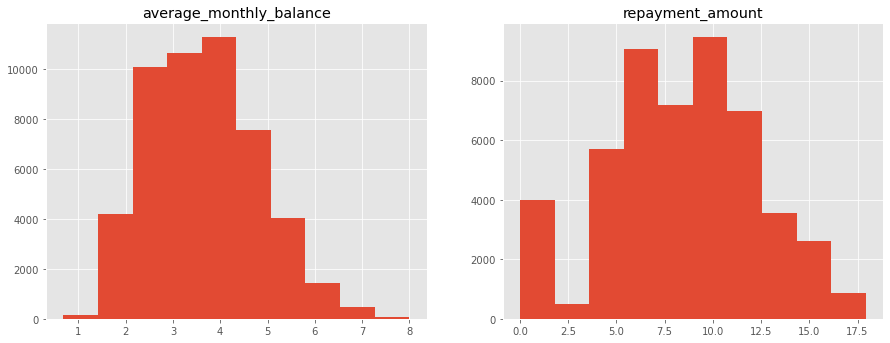

In [577]:
plt.figure(figsize = (15,25))
plt.subplot(4,2,1)
(new_data['average_monthly_balance']**(1/6)).hist()
plt.title('average_monthly_balance')

plt.subplot(4,2,2)
(new_data['repayment_amount']**(1/5)).hist()
plt.title('repayment_amount')


### using power transformation for data and test_data for normal distribution

In [578]:
new_data['loan_amount'] = new_data['loan_amount']**(1/5)
new_data['collateral_value'] = new_data['collateral_value']**(1/5)
new_data['cheque_bounces'] = new_data['cheque_bounces']**(1/2)
new_data['missed_repayments'] = new_data['missed_repayments']**(1/2)
new_data['vintage_in_months'] = new_data['vintage_in_months']**(1/2)
new_data['monthly_emi'] = new_data['monthly_emi']**(1/6)
new_data['repayment_amount'] = new_data['repayment_amount']**(1/5)
new_data['average_monthly_balance'] = new_data['average_monthly_balance']**(1/6)

In [579]:
test_new_data['collateral_value'] = test_new_data['collateral_value']**(1/5)
test_new_data['cheque_bounces'] = test_new_data['cheque_bounces']**(1/2)
test_new_data['missed_repayments'] = test_new_data['missed_repayments']**(1/2)
test_new_data['vintage_in_months'] = test_new_data['vintage_in_months']**(1/2)
test_new_data['monthly_emi'] = test_new_data['monthly_emi']**(1/6)
test_new_data['repayment_amount'] = test_new_data['repayment_amount']**(1/5)
test_new_data['average_monthly_balance'] = test_new_data['average_monthly_balance']**(1/8)

In [580]:
categorical_data.head(5)

loan_acc_num  customer_name                         customer_address  \
0   LN79307711     Aarna Sura        09/506, Anand Path, Ongole 646592   
1   LN88987787    Amira Konda      11, Dhaliwal Circle\nRaichur 659460   
2   LN78096023  Eshani Khosla   H.No. 31\nAtwal Street\nKatihar-037896   
3   LN56862431     Divij Kala     766, Gulati Marg\nPudukkottai-051396   
4   LN77262680    Vaibhav Bir  55/73, Sachdev Marg\nDharmavaram-332966   

          loan_type disbursal_date default_date  
0  Consumer-Durable     2019-04-14   2020-07-31  
1       Two-Wheeler     2015-04-14   2016-07-30  
2               Car     2015-01-10   2015-04-18  
3       Two-Wheeler     2018-02-07   2018-09-13  
4  Consumer-Durable     2014-12-25   2016-02-20

In [581]:
curr_time = pd.to_datetime("now")

In [583]:
#deriving new feature using date column
new_data['difference'] = (curr_time-new_data['default_date'])/np.timedelta64(1,'D')
test_new_data['difference'] = (curr_time-test_new_data['default_date'])/np.timedelta64(1,'D')

TypeError: unsupported operand type(s) for -: 'Timestamp' and 'str'

In [584]:
#dropping unnecessary columns for model building
new_data = new_data.drop(['disbursal_date', 'default_date','loan_acc_num', 'customer_name', 'customer_address'],1)

In [585]:
#dropping unnecessary columns for model building
test_new_data = test_new_data.drop(['disbursal_date', 'default_date','loan_acc_num', 'customer_name', 'customer_address'],1)

In [586]:
#creating dummy variables
get_dummy = pd.get_dummies(new_data['loan_type'],drop_first=True)
test_dummy = pd.get_dummies(test_new_data['loan_type'],drop_first=True)

In [587]:
#dropping after creating dummy varibales
new_data = new_data.drop(['loan_type'],axis=1)
test_new_data = test_new_data.drop(['loan_type'],axis=1)

In [588]:
new_data1 = pd.concat([new_data,get_dummy],axis=1)
test_new_data1 = pd.concat([test_new_data,test_dummy],axis=1)

In [ ]:
#downloadng the prepared dataset for PyCaret
new_data.to_csv(r"desktop:/pycaret_test.csv",index=False)

In [589]:
##train-test split
from sklearn.model_selection import train_test_split
X = new_data1.drop(columns=['target'])
y = new_data [['target']]
# Choose any random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

## Feature scaling

In [590]:
 #Standardization methods
from sklearn.preprocessing import StandardScaler

In [591]:
#Instantiating the Scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [592]:
#Fitting the data and tranforming
unseen = scaler.fit_transform(test_new_data1)

In [593]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

### RFE

In [594]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=10)      
rfe = rfe.fit(X_train, y_train)

In [595]:
#Rsqaure on test data
from sklearn.linear_model import *
from  sklearn import metrics
#Rsquared on test set
y_pred_lr = rfe.predict(X_test)
metrics.r2_score(y_test, y_pred_lr)

0.7756349800595067

### Creating multiple linear regression

In [596]:
lr = LinearRegression()

lr.fit(X_train, y_train)
#Rsquared on test set
y_pred_lr = lr.predict(X_test)
metrics.r2_score(y_test, y_pred_lr)

0.7811962854570624

### Using Random Forest Regressor

In [597]:
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(bootstrap= True,n_estimators = 200, random_state = 42, max_depth=4,max_features=None,min_samples_leaf= 2,min_samples_split= 4)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, max_features=None, min_samples_leaf=2,
                      min_samples_split=4, n_estimators=200, random_state=42)

In [598]:
y_pred_train = rf_regressor.predict(X_train)
print(r2_score(y_train, y_pred_train))

0.7245706459113583


In [599]:
y_pred_test = rf_regressor.predict(X_test)
print(r2_score(y_test, y_pred_test))

0.7273636647483164


### Gradient Boosting regression

In [600]:
# import library
from sklearn.ensemble import GradientBoostingRegressor

In [601]:
# Data preprocessing
gbr_params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 4,
          'learning_rate': 0.01,
          'loss': 'squared_error'}

In [602]:
# Fit regression model
gbr = GradientBoostingRegressor(**gbr_params)

gbr.fit(X_train, y_train)

y_pred=gbr.predict(X_test)

In [603]:
print("R squared: %.3f" % gbr.score(X_test, y_test))

R squared: 0.901


In [604]:
y_pred_train=gbr.predict(X_train)
#
# Print Coefficient of determination R^2
print("train set R-square value: ",r2_score(y_train, y_pred_train))

train set R-square value:  0.9040959918040924


In [605]:
y_pred_test=gbr.predict(X_test)
#
# Print Coefficient of determination R^2
print("test set R-square value: ",r2_score(y_test, y_pred_test))

test set R-square value:  0.9009826242325176


[0.00000000e+00 8.27642038e-03 6.29420805e-03 9.57308377e-02
 2.29346406e-01 4.55337925e-01 5.66951780e-02 0.00000000e+00
 2.61179097e-03 1.05657884e-01 3.97555164e-02 2.93833105e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]


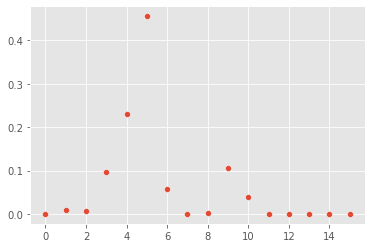

In [606]:
# ploting feature importance
print(gbr.feature_importances_)
# plot
sns.scatterplot(range(len(gbr.feature_importances_)), gbr.feature_importances_)
plt.show()

<AxesSubplot:>

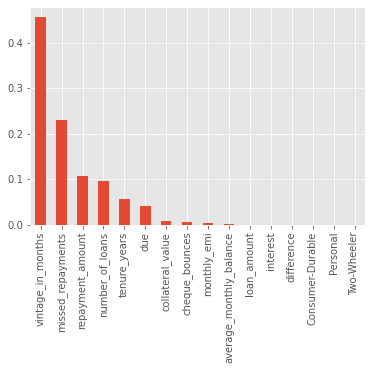

In [607]:
feature_importances = pd.Series(gbr.feature_importances_, index=X.columns)
feature_importances.nlargest(20).plot(kind='bar')

### Extreme Gradient Boosting Regression

In [ ]:
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor

In [ ]:
sudo pip install xgboost

## Adaboost Regression

In [626]:
from sklearn.ensemble import AdaBoostRegressor
ada_reg = AdaBoostRegressor(n_estimators=500,learning_rate=0.1)
Adaboost=ada_reg.fit(X_train,y_train)
prediction=Adaboost.predict(X_train)
print("train score: ", r2_score(y_train, prediction))
y_pred_test=Adaboost.predict(X_test)
print("test score: ", r2_score(y_test, y_pred_test))

train score:  0.76777463966669
test score:  0.7721780773339665


## Pycaret

In [631]:
dataset = new_data
data_ = dataset.sample(frac=0.8, random_state=786).reset_index(drop=True)
data_unseen = dataset.drop(data_.index).reset_index(drop=True)

print('Data for Modeling: '+ str(data_.shape))
print('Unseen Data For Predictions: '+ str(data_unseen.shape))

KeyError: '[  163   244   805  1428  1536  2892  3122  3992  4175  4205  4657  5030\n  5500  6008  6079  6705  6908  7305  8121  8434  9482  9620 10327 11649\n 11756 12047 12472 12771 12876 13163 13218 13239 13592 14302 14500 14803\n 14840 14871 15499 16776 16897 17322 17384 18084 19080 20020 20322 20891\n 23095 23630 23836 24531 24860 25187 25336 25664 26015 26149 26185 26568\n 27155 27786 28536 29427 29943 29972 30308 30593 30850 31478 32047 32311\n 34593 36118 38774 39092] not found in axis'

In [ ]:
#import pycaret
from pycaret.regression import *

In [ ]:
exp_reg101 = setup(data = data_, target = 'target', session_id=123) 

In [ ]:
compare_models()

In [ ]:
cat = create_model('catboost')

In [ ]:
print(cat)

In [ ]:
tuned_cat = tune_model(cat)

In [ ]:
plot_model(tuned_cat)

In [ ]:
plot_model(tuned_cat, plot = 'error')

In [ ]:
plot_model(tuned_cat, plot='feature')

In [ ]:
evaluate_model(tuned_cat)

In [ ]:
predict_model(tuned_cat);

In [ ]:
final_cat = finalize_model(tuned_cat)

In [ ]:
predict_model(final_cat);

In [ ]:
unseen_predictions = predict_model(final_cat, data=data_unseen)
unseen_predictions.head()

In [ ]:
save_model(final_cat,'Final Catboost Model BFSI')

In [ ]:
saved_final_lightgbm = load_model('Final Catboost Model BFSI')

In [ ]:
#######Using XGBoost Regressor######

In [ ]:
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor

In [ ]:
# define model
model = XGBRegressor()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('R_squared: %.3f (%.3f)' % (scores.mean(), scores.std()) )

In [ ]:
# evaluate model
scores = cross_val_score(model, X_test, y_test, scoring='r2', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('R_squared: %.3f (%.3f)' % (scores.mean(), scores.std()) )

In [ ]:
from xgboost import XGBRegressor
# define model
RegModel=XGBRegressor(max_depth=4, learning_rate=0.01, n_estimators=500, objective='reg:linear', booster='gbtree')

In [ ]:
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_train)
print("train score: ", r2_score(y_train, prediction))
y_pred_test=XGB.predict(X_test)
print("test score: ", r2_score(y_test, y_pred_test))

In [ ]:
#####Using Adaboost Regressor#####

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
ada_reg = AdaBoostRegressor(n_estimators=500,learning_rate=0.1)
Adaboost=ada_reg.fit(X_train,y_train)
prediction=Adaboost.predict(X_train)
print("train score: ", r2_score(y_train, prediction))
y_pred_test=Adaboost.predict(X_test)
print("test score: ", r2_score(y_test, y_pred_test))

In [ ]:
#####Using ElasticNet : Hybrid Regularized Model######

In [ ]:
from sklearn.datasets import load_boston
from sklearn.linear_model import ElasticNet,ElasticNetCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]

In [ ]:
elastic=ElasticNet(alpha=0.001).fit(X_train, y_train)
y_pred = elastic.predict(X_test)
score = elastic.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
      .format(score, mse, np.sqrt(mse)))

In [ ]:
x_ax = range(len(X_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [ ]:
elastic_cv=ElasticNetCV(alphas=alphas, cv=5)
model = elastic_cv.fit(X_train, y_train)
print("Alpha: ",model.alpha_)
print("Intercept: ",model.intercept_)

In [ ]:
y_pred = model.predict(X_test)
score = model.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
      .format(score, mse, np.sqrt(mse)))

In [ ]:
#####Using LightGBM######

In [ ]:
plt.style.use('ggplot')
import lightgbm as ltb

In [ ]:
model = ltb.LGBMRegressor()
model.fit(X_train, y_train)
print(); print(model)

In [ ]:
y_pred = model.predict(X_test)
print("Rsqaured on test data: ",metrics.r2_score(y_test, y_pred))

In [ ]:
#####Model Evaluation: Hyperparameter Tuning#####

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBRegressor
params = { 'max_depth': [3,4,5],
           'learning_rate': [0.01, 0.05, 0.1,0.25,0.5,0.015,1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}

xgbr = xgb.XGBRegressor(seed = 20)

clf = GridSearchCV(estimator=xgbr, 
                   param_grid=params,
                   scoring='r2', 
                   verbose=1)
clf.fit(X_train, y_train)
print("Best parameters:", clf.best_params_)

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
# define the model with best resulted parameters
RegModel=XGBRegressor(colsample_bytree= 0.7, max_depth=3, learning_rate=0.5, n_estimators=1000, objective='reg:linear', booster='gbtree')
xgbr = xgb.XGBRegressor(seed = 20)
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_train)
print("train score: ", r2_score(y_train, prediction))
y_pred_test=XGB.predict(X_test)
print("test score: ", r2_score(y_test, y_pred_test))

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
# define the model with best resulted parameters
RegModel=XGBRegressor(colsample_bytree= 0.7, max_depth=3, learning_rate=0.5, n_estimators=1000, objective='reg:linear', booster='gbtree')
xgbr = xgb.XGBRegressor(seed = 20)
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_train)
print("train score: ", r2_score(y_train, prediction))
y_pred_test=XGB.predict(X_test)
print("test score: ", r2_score(y_test, y_pred_test))

In [ ]:
data.columns

In [ ]:
test_data = sc.fit_transform(test_data)

In [ ]:
test_data = pd.DataFrame(test_data)

In [ ]:
test_data.columns = ['loan_amount', 'collateral_value', 'cheque_bounces', 'number_of_loans',
       'missed_repayments', 'vintage_in_months', 'tenure_years', 'interest',
       'monthly_emi', 'repayment_amount', 'due',
       'average_monthly_balance', 'difference', 'Consumer-Durable', 'Personal',
       'Two-Wheeler']

In [ ]:
#Making predictions
final_predictions = XGB.predict(test_data)
final_prediction_series = pd.Series(final_predictions)

In [ ]:
#Combining the results into dataframe
submission_df = pd.DataFrame({'id':test['loan_acc_num'].values, 'LGD':final_prediction_series.values})

In [ ]:
submission_df.sample(10)

In [ ]:
submission_df.to_csv("G:/M/BA/BFSI Credit Risk Analysis/submission.csv",index=False)